# Day10 Data Visualization Tools: Matplotlib 
# 視覺化資料工具：Matplotlib

Matplotlib是Python的2D可視化操作界面，歷史悠久、教學資源豐富，但繪圖步驟較為繁複且繪圖風格略顯單調。以下介紹一些Matplotlib可以繪圖的種類與方式。

Matplotlib is a Python 2D plotting library which produces figures in a variety of formats and interactive environments across platforms. Although the plotting steps is slightly complex comparing to some new visualization tools and the plotting styles might seem a bit dull, there are many tutorials of it due to it's long history. In this article, we will walk through some graphs Matplotlib could plot.

In [1]:
import matplotlib.pyplot as plt # 載入繪圖套件簡寫成plt import and abbreviate as plt
import numpy as np 

## 圖像 Images 
Matplotlib可以繪製圖像，範例為將(MRI)讀入為NumPy陣列。<br>
Matplotlib could read in images (in this case a MRI image), turn it into a NumPy array, and use imshow to show in greyscale.

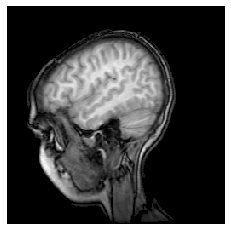

In [2]:
import matplotlib.cbook as cbook # 載入範例 import the example

# Data are 256x256 16 bit integers.
with cbook.get_sample_data('s1045.ima.gz') as dfile:
    im = np.frombuffer(dfile.read(), np.uint16).reshape((256, 256))

fig, ax = plt.subplots(num="MRI_demo")
ax.imshow(im, cmap="gray") # 使用imshow以灰度顯示 use imshow to show in greyscale.
ax.axis('off')

plt.show()

## 有形狀補丁的圖像 Clipping images with patches 


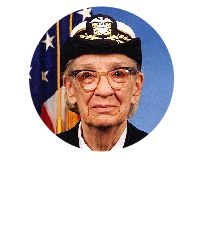

In [3]:
import matplotlib.patches as patches # 載入形狀補丁

with cbook.get_sample_data('grace_hopper.png') as image_file: 
    image = plt.imread(image_file)

fig, ax = plt.subplots()
im = ax.imshow(image)
patch = patches.Circle((260, 200), radius=200, transform=ax.transData) # 使用圓形的補丁 clip with a circle patch
im.set_clip_path(patch)

ax.axis('off')
plt.show()

## 繪製數組的稀疏模式 Plot the sparsity pattern of arrays

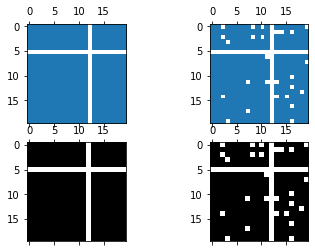

In [4]:
fig, axs = plt.subplots(2, 2)
ax1 = axs[0, 0]
ax2 = axs[0, 1]
ax3 = axs[1, 0]
ax4 = axs[1, 1]

x = np.random.randn(20, 20)
x[5, :] = 0.
x[:, 12] = 0.

ax1.spy(x, markersize=5)
ax2.spy(x, precision=0.1, markersize=5)

ax3.spy(x)
ax4.spy(x, precision=0.1)

plt.show()

## 散點圖加直方圖 Scatter plot with histograms
我們也可以在散點圖旁加上直方圖，能更全面展示資料。<br>
We can also create a scatter plot with histograms to its sides to get more intuition of the data.

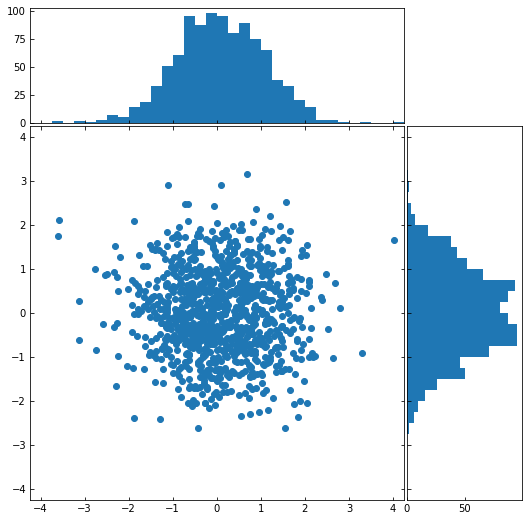

In [5]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# the random data
x = np.random.randn(1000)
y = np.random.randn(1000)

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(x, y)

# now determine nice limits by hand:
binwidth = 0.25
lim = np.ceil(np.abs([x, y]).max() / binwidth) * binwidth
ax_scatter.set_xlim((-lim, lim))
ax_scatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(x, bins=bins)
ax_histy.hist(y, bins=bins, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.show()

## 子圖 Subplot
使用pyplot.subplots可以創建多個子圖並列，以便比較。貞對子圖可以做很細節的操控，範例示範簡易的子圖操作。<br>
Create a figure and a grid of subplots by using pyplot.subplots and we have a lot of controls over how the individual plots are created. 

In [6]:
# sphinx_gallery_thumbnail_number = 11
# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

Text(0.5, 1.0, 'A single plot')

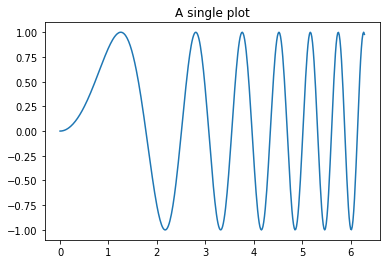

In [7]:
# 先畫出第一個圖 plot one graph first
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('A single plot')

### 疊加子圖(沿一個軸向) Stacking subplots in one direction

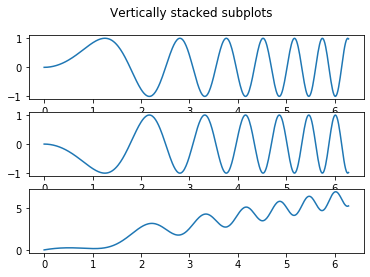

In [8]:
fig, axs = plt.subplots(3) # 指定子圖數 specify the number of subplots
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x, y)
axs[1].plot(x, -y)
axs[2].plot(x, x-y)

### 疊加子圖(沿兩個軸向) Stacking subplots in two directions

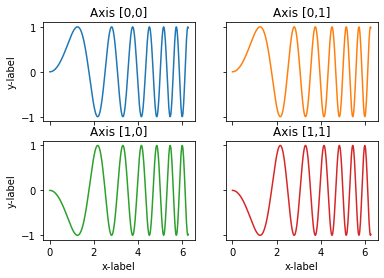

In [9]:
fig, axs = plt.subplots(2, 2) 
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0,0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0,1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1,0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1,1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

文中若有錯誤還望不吝指正，感激不盡。
Please let me know if there’s any mistake in this article. Thanks for reading.

Reference 參考資料：

[1] 第二屆機器學習百日馬拉松內容

[2] [Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

[3] [Matplotlib](https://matplotlib.org/index.html)

[4] [matplotlib](https://zh.wikipedia.org/wiki/Matplotlib)